In [31]:
import seaborn as sns
# seabornをimportすると、pandasも同時にインポートしてくれるらしい。
 
data = sns.load_dataset("iris") 
# ちなみにこのirisはpandasのdataframeです。

In [32]:
#sns.pairplot(data, hue = "species", diag_kind="kde")
# 変数に関するすべての関係性を図示してくれる。kdeはカーネル密度推定を通したという意味。

In [33]:
data = data.sample(frac=1).reset_index(drop=True)
# sampleはデータをシャッフルするモジュール。　reset_indexはインデックス指定をリセットするもの。

In [34]:
use_row_limit = int(data.shape[0] * 0.8) 
# shapeは行数と列数を獲得するモジュール。０が行、１が列数を取得する。
 
f"全データが{data.shape[0]}個、そのうち{use_row_limit}個目までを教師データとして使う"
# f文字列＝文字列を直接ｆの変数として指定できる。

'全データが150個、そのうち120個目までを教師データとして使う'

In [35]:
use_column=list(range(data.shape[1]))[:-1]
# range関数はiterから一個ずつ要素を抜き出す。list関数でそれを一個ずつリストに格納している。そのあと、スライスで後ろから一個だけ要素を減らしている。
 
f"全列が{data.shape[1]}個、そのうち{use_column}番目にあたる列が特徴にあたる"

# スライスの使い方

#list = ["A", "B", "C", "D", "E"]

#slice1 = list[1:2]     # ["B"]
#slice2 = list[1:-1]    # ["B", "C", "D"]
#slice3 = list[1:]      # ["B", "C", "D", "E"]
#slice4 = list[:2]      # ["A", "B"]
#slice5 = list[:]       # ["A", "B", "C", "D", "E"]

'全列が5個、そのうち[0, 1, 2, 3]番目にあたる列が特徴にあたる'

In [36]:
# トレーニングデータの用意
train_data = data.iloc[:use_row_limit,:]
# ilocはpandasのデータ抽出用関数。スライスの使い方はリストに近い。iloc[行数、列数]
 
#print(train_data.shape)
#train_data.head()

In [37]:
# テストデータの用意
test_data = data.iloc[use_row_limit:,:]
 
#print(test_data.shape)
#test_data.head()

In [38]:
# クラス分類におけるk近傍法の実践
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=3, n_jobs=-1)

knn.fit(
    X = train_data.iloc[:,use_column].values, 
    y = train_data["species"].values,
)

X_train = train_data.iloc[:,use_column].values
Y_train = train_data["species"].values
Y_pred = knn.predict(test_data.iloc[:,use_column].values)
Y_test = test_data["species"].values
X_test = test_data.iloc[:,use_column].values

Y_pred
#精度確認用のライブラリインポートと実行
# accuracy_score関数は認識率を求めるもの。
from sklearn import metrics
a = metrics.accuracy_score(Y_test, Y_pred)

# accは認識率
acc = sum(test_data["species"] == Y_pred) / len(Y_pred) # test_dataと予測が一致した数と予測のデータ数を割る。

print(a)
print(acc)

1.0
1.0


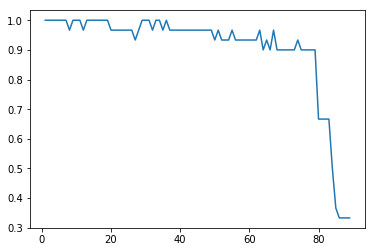

In [39]:
# kの値を推測する。
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = []
for k in range(1, 90):
    knn = KNN(n_neighbors=k) # インスタンス生成。
    knn.fit(X_train,Y_train)                 # モデル作成実行
    Y_pred = knn.predict(X_test)              # 予測実行
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred)) # 精度格納

k_range = list(range(1, 90))
plt.plot(k_range, accuracy)